In [1]:
%matplotlib inline
import sys
sys.path.insert(0,'..')
from IPython.display import HTML,Image,SVG,YouTubeVideo
from helpers import header

HTML(header())

# Typical image processing pipelines

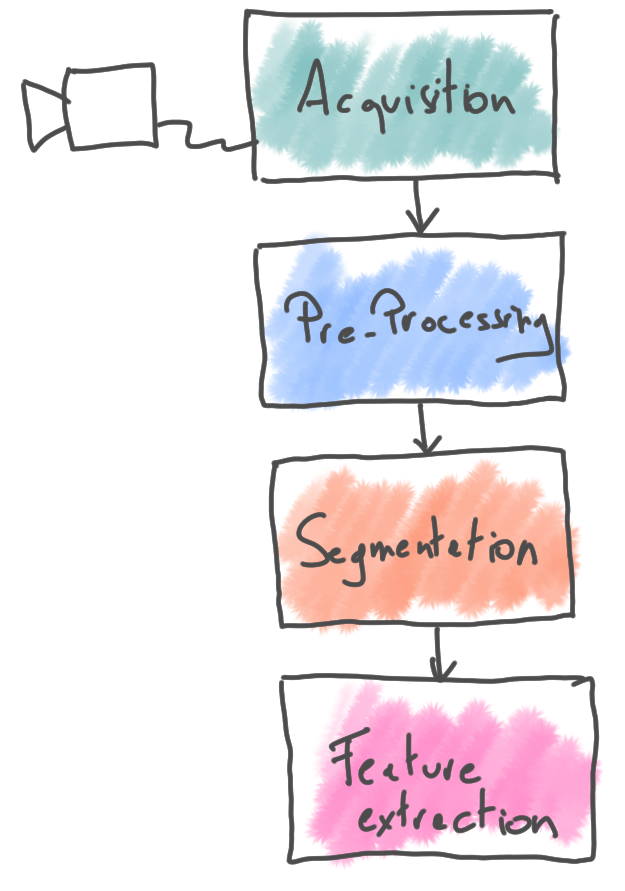

In [2]:
Image('http://homepages.ulb.ac.be/~odebeir/data/ip_chain.png')

The classical image processing chain is illstrated above, we can identify the 4 major steps:

* **image acquisition**, when photon are converted into a matrix of numbers
* **pre-processing**, used to correct image acquisition default or enhance image quality in order to facilitate...
* the **segmentation**, that split image into object of interest and background, then each object of interest are described by,
* **feature extraction**, that describe shape, color, texture, etc 

of course, other approaches exist, depending on the image processing task and the difficulty of it.


## Image segmentation

Segmentation is an important step in image understanding, it aims to divide an image into "objects" i.e. connected pixels that share some semantic content. It is an ill-posed problem because often the image is the result of a 3D to 2D projection, it means that an object well identified in the 3D space can be impossible to identify without ambiguity.

Segmentation result is a disjoint set of regions. Here we will talk about object and background.

$$ \bigcup_{i=1}^{N} R_i = I$$

$$ R_i \cap R_j = \phi \:,\: 1 \leq i,j \leq N, i\neq j  $$

Since segmentation tackles the identification of semantic content, it often requires low level AND high-level approaches.

The low-level approach or bottom-up approach considers the segmentation as an aggregation of pixels based on some common features. For example, pixles can share a common intensity, a common color, texture, or be "contained" inside some "border".

The high-level approach or top-down approach tries to identify object starting from the complete image, knowing a priori what to look for. For example, detecting the position of a face inside the image to help camera auto-focus.

Human vision is a combination of both mechanisms, retina send the signal from the sensor to the brain, grouping neighbours cones and rods to detect patterns such as borders, isolated points etc, but at the same time the brain suggest objects that could be seen and that helps the detection. 

The segmentation can be a very complex problem, and many methods have been proposed. We will see in the following sections some of the more common ones, this is far from being exhaustive, this topic remains an open issue.

The following approaches will be illustrated:
* the histogram based segmentation
* the border based segmentation
* the region based segmentation 
* one model based object detection 
* one model based object segmentation

# Other approaches

Sometime the object of interest is more easy to detect than to segment, the image processing chain becomes:
 
 

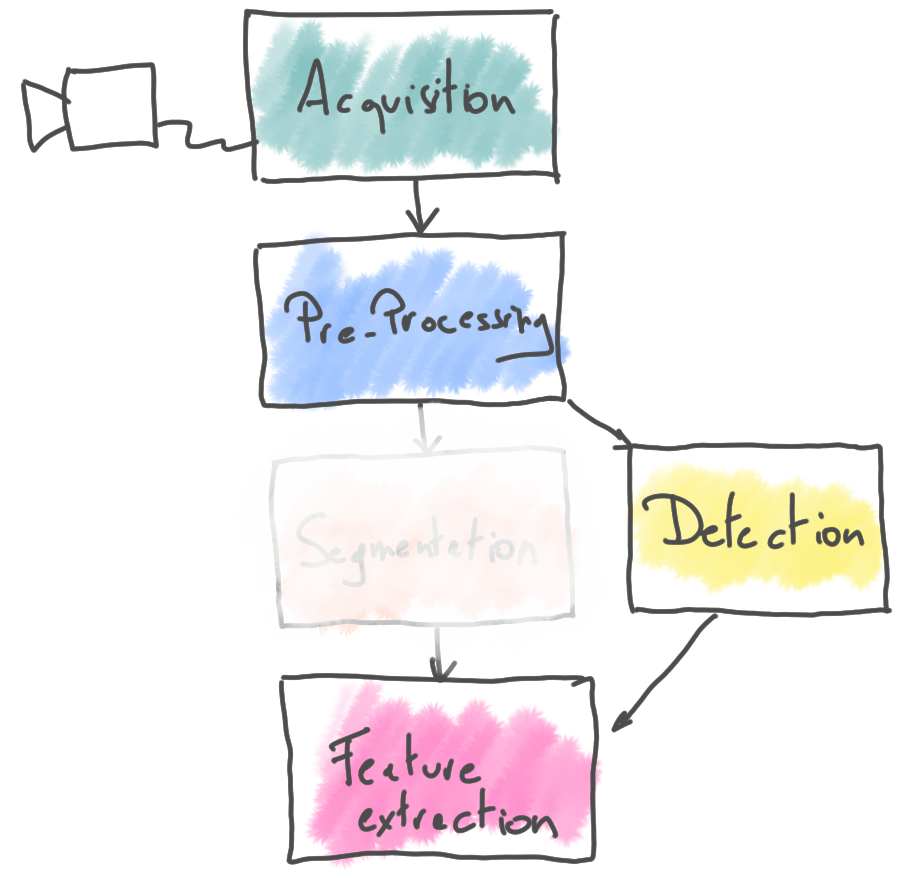

In [3]:
Image('http://homepages.ulb.ac.be/~odebeir/data/ip_chain2.png')